## MRI

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the file
df = pd.read_csv('TotalMRI_Timeseries.csv')
df.head()

,Region,Region Name,Org Code,Provider name,Date,Total MRI Scans,Total Prostate MRI
0,Y54,NaN,REM,Aintree University Hospital NHS Foundation Trust,01/04/2016,1095.0,55
1,Y54,NaN,REM,Aintree University Hospital NHS Foundation Trust,01/05/2016,865.0,43
2,Y54,NaN,REM,Aintree University Hospital NHS Foundation Trust,01/06/2016,610.0,31
3,Y54,NaN,REM,Aintree University Hospital NHS Foundation Trust,01/07/2016,470.0,24
4,Y54,NaN,REM,Aintree University Hospital NHS Foundation Trust,01/08/2016,395.0,20


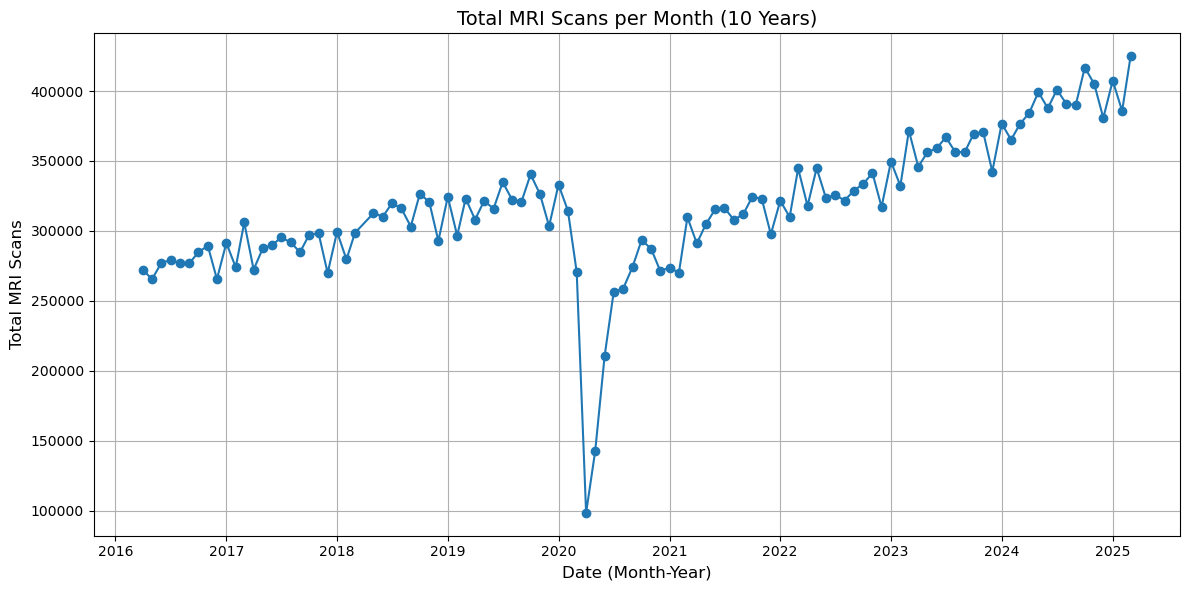

In [4]:


# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Ensure Total MRI Scans is numeric
df['Total MRI Scans'] = pd.to_numeric(df['Total MRI Scans'], errors='coerce')

# Group by month and year
df_grouped = df.groupby(df['Date'].dt.to_period("M"))['Total MRI Scans'].sum()

# Convert to DataFrame and reset index for plotting
df_grouped = df_grouped.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-')
plt.title("Total MRI Scans per Month (10 Years)", fontsize=14)
plt.xlabel("Date (Month-Year)", fontsize=12)
plt.ylabel("Total MRI Scans", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


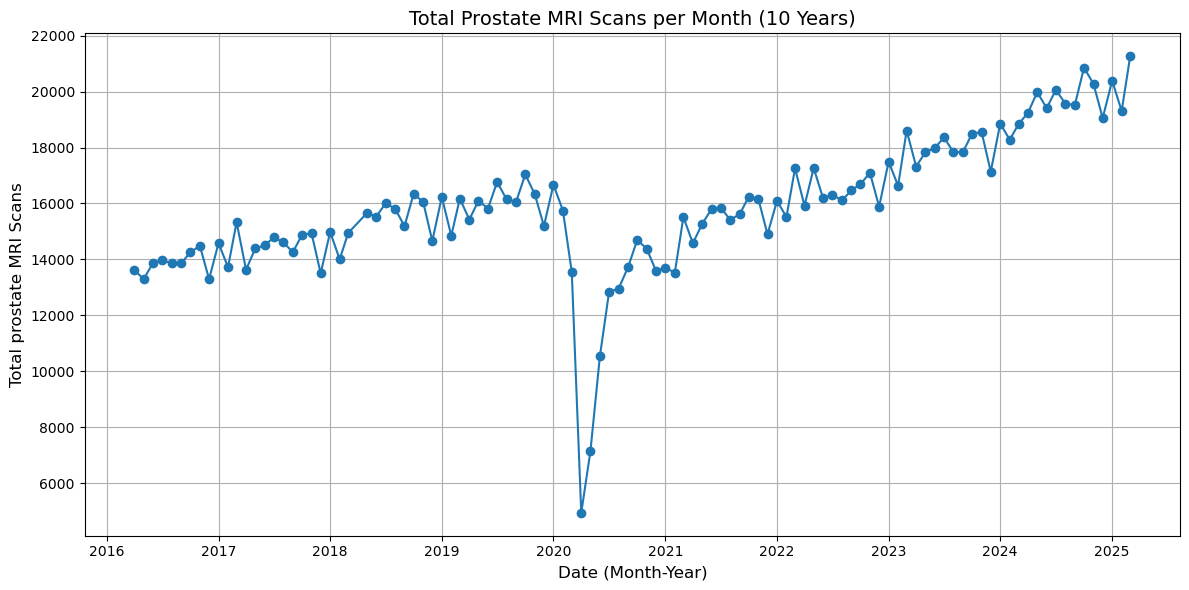

In [5]:
# Ensure Total MRI Scans is numeric
df['Total Prostate MRI'] = pd.to_numeric(df['Total Prostate MRI'], errors='coerce')

# Group by month and year
df_grouped = df.groupby(df['Date'].dt.to_period("M"))['Total Prostate MRI'].sum()

# Convert to DataFrame and reset index for plotting
df_grouped = df_grouped.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-')
plt.title("Total Prostate MRI Scans per Month (10 Years)", fontsize=14)
plt.xlabel("Date (Month-Year)", fontsize=12)
plt.ylabel("Total prostate MRI Scans", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

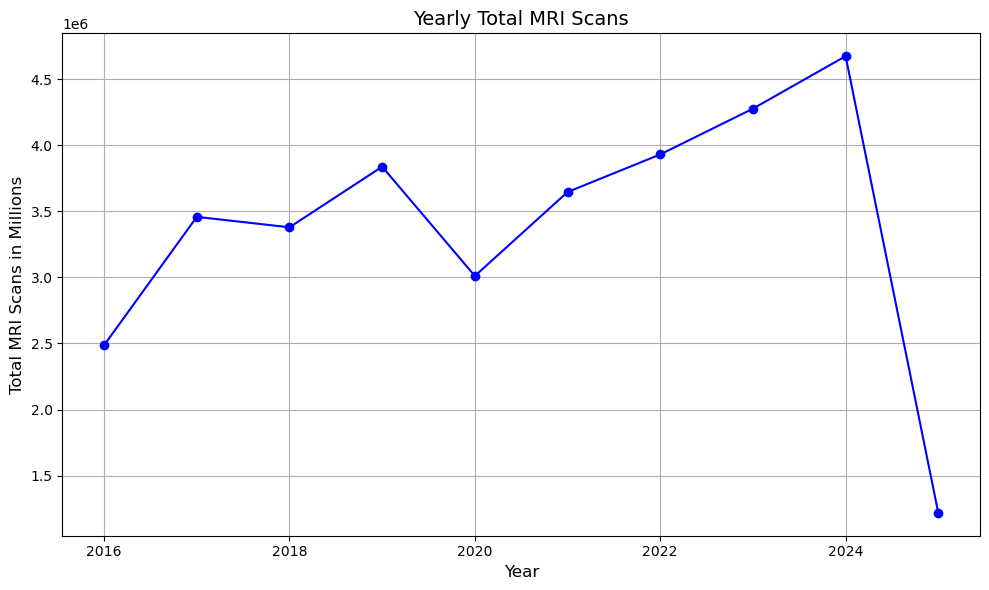

In [6]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Convert 'Total MRI Scans' to numeric (in case of missing or non-numeric values)
df['Total MRI Scans'] = pd.to_numeric(df['Total MRI Scans'], errors='coerce')

# Group data by year and sum the Total MRI Scans
yearly_total_mri = df.groupby(df['Date'].dt.year)['Total MRI Scans'].sum()

# Plot the yearly trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_total_mri.index, yearly_total_mri.values, marker='o', linestyle='-', color='blue')
plt.title("Yearly Total MRI Scans", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total MRI Scans in Millions", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

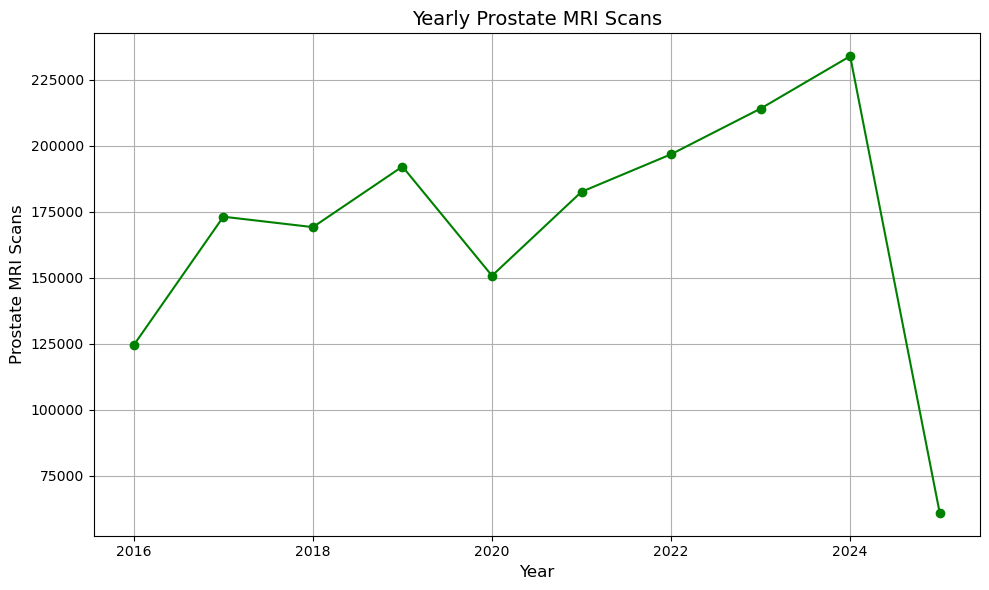

In [7]:
# --- Yearly Prostate MRI Scans ---

# Convert 'Total Prostate MRI' column to numeric
df['Total Prostate MRI'] = pd.to_numeric(df['Total Prostate MRI'], errors='coerce')

# Group data by year and sum the Prostate MRI Scans
yearly_prostate_mri = df.groupby(df['Date'].dt.year)['Total Prostate MRI'].sum()

# Plot the yearly trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_prostate_mri.index, yearly_prostate_mri.values, marker='o', linestyle='-', color='green')
plt.title("Yearly Prostate MRI Scans", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Prostate MRI Scans", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


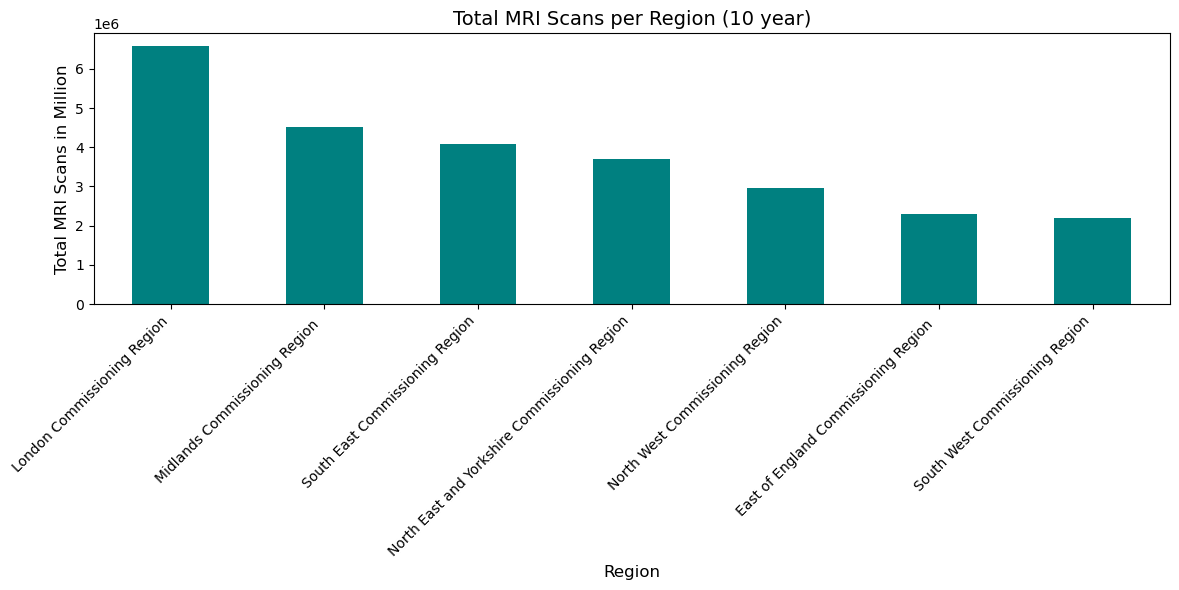

Region Name
London Commissioning Region                      6575860.0
Midlands Commissioning Region                    4505005.0
South East Commissioning Region                  4094730.0
North East and Yorkshire Commissioning Region    3711770.0
North West Commissioning Region                  2970890.0
East of England Commissioning Region             2287105.0
South West Commissioning Region                  2207900.0
Name: Total MRI Scans, dtype: float64

In [8]:
# --- Fill Missing Region Names and Calculate Total MRI per Region ---






# 1. Create mapping of Region -> Region Name from non-missing values
region_mapping = (
    df.dropna(subset=['Region Name'])[['Region', 'Region Name']]
      .drop_duplicates()
      .set_index('Region')['Region Name']
      .to_dict()
)

# 2. Fill missing Region Names using the mapping
df['Region Name'] = df.apply(
    lambda row: region_mapping.get(row['Region'], row['Region Name']),
    axis=1
)

# 3. Calculate total MRI scans per region
region_totals = df.groupby('Region Name')['Total MRI Scans'].sum().sort_values(ascending=False)

# Display result
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
region_totals.plot(kind='bar', color='teal')
plt.title("Total MRI Scans per Region (10 year)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total MRI Scans in Million", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

region_totals


In [9]:
## Total MRI data per region for 2024

# Filter only 2024 data
df_2024 = df[df['Date'].dt.year == 2024]

# Fill missing Region Names (like we did before using Provider → Region mapping)
provider_region_mapping = (
    df.dropna(subset=['Region Name'])[['Provider name', 'Region Name']]
      .drop_duplicates()
      .set_index('Provider name')['Region Name']
      .to_dict()
)

df_2024 = df_2024.copy()  # avoid SettingWithCopyWarning
df_2024['Region Name'] = df_2024.apply(
    lambda row: provider_region_mapping.get(row['Provider name'], row['Region Name']),
    axis=1
)

# Compute totals by Region Name for 2024
region_totals_2024 = (
    df_2024.groupby('Region Name')['Total MRI Scans']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# ✅ in Jupyter you can just display the dataframe:
region_totals_2024


,Region Name,Total MRI Scans
0,North East and Yorkshire Commissioning Region,925210.0
1,Midlands Commissioning Region,911550.0
2,London Commissioning Region,835585.0
3,South East Commissioning Region,658265.0
4,North West Commissioning Region,566905.0
5,East of England Commissioning Region,412140.0
6,South West Commissioning Region,364205.0


In [10]:
# --- Total Prostate MRI data per region for 2024 ---
# Filter only 2024 data
df_2024 = df[df['Date'].dt.year == 2024].copy()

# Fill missing Region Names (using Provider → Region mapping like before)
provider_region_mapping = (
    df.dropna(subset=['Region Name'])[['Provider name', 'Region Name']]
      .drop_duplicates()
      .set_index('Provider name')['Region Name']
      .to_dict()
)

df_2024['Region Name'] = df_2024.apply(
    lambda row: provider_region_mapping.get(row['Provider name'], row['Region Name']),
    axis=1
)

# Make sure values are numeric
df_2024['Total Prostate MRI'] = pd.to_numeric(df_2024['Total Prostate MRI'], errors='coerce')

# Compute totals by Region Name for 2024 (Prostate MRIs)
region_prostate_totals_2024 = (
    df_2024.groupby('Region Name')['Total Prostate MRI']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Show the table
region_prostate_totals_2024


,Region Name,Total Prostate MRI
0,North East and Yorkshire Commissioning Region,46323.0
1,Midlands Commissioning Region,45624.0
2,London Commissioning Region,41826.0
3,South East Commissioning Region,32942.0
4,North West Commissioning Region,28378.0
5,East of England Commissioning Region,20629.0
6,South West Commissioning Region,18231.0


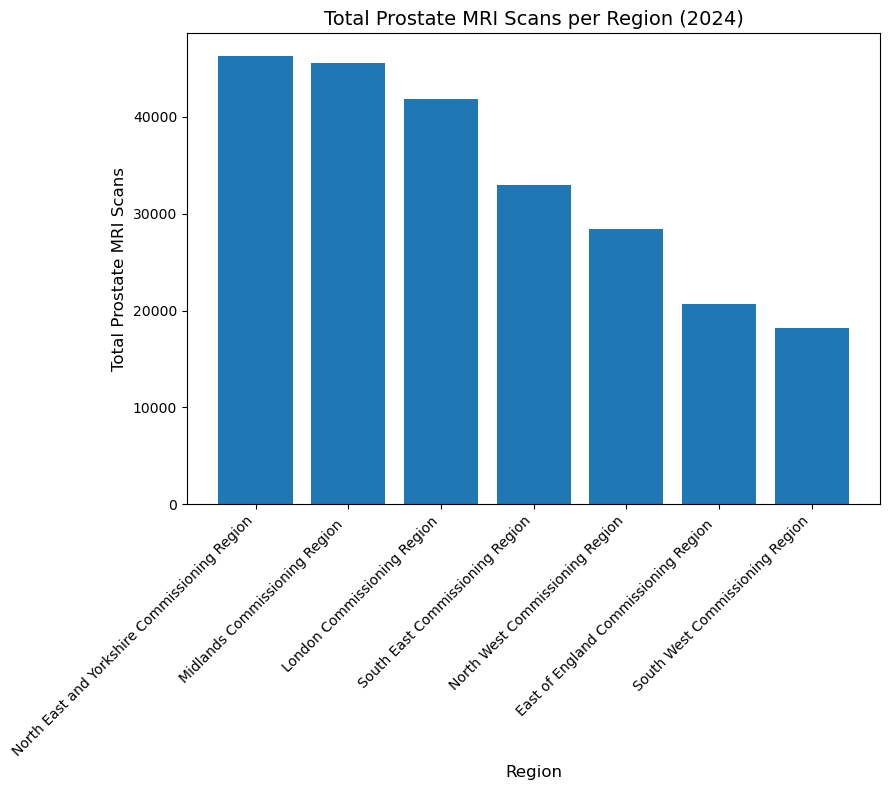

In [11]:
# --- Bar chart for 2024 Prostate MRI totals ---
plt.figure(figsize=(9, 8))
plt.bar(region_prostate_totals_2024["Region Name"],
        region_prostate_totals_2024["Total Prostate MRI"])

plt.title("Total Prostate MRI Scans per Region (2024)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Prostate MRI Scans", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()